In [1]:
import spacy
from docx import Document
nlp = spacy.load("en_core_web_md")

/Users/lukas/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
bachelor_thesis = Document('./../Linss-Lukas-ba.docx')
paragraphs = bachelor_thesis.paragraphs
text_paragraphs = []
for p in paragraphs:
    if len(p.text) > 100:
        text_paragraphs.append(p.text)

In [3]:
def getSimilarity(sentence, paragraph):
    sentence = nlp(sentence.text)
    similarity_list = []
    for i, s in enumerate(nlp(paragraph).sents):
        similarity_list.append((s.text, sentence.similarity(nlp(s.text))))
    
    return similarity_list

In [ ]:
doc = nlp(bachelor_thesis.paragraphs[3].text)
sentences = list(doc.sents)
getSimilarity(sentences[3], doc)

In [5]:
similarity_matrix = [getSimilarity(s, doc) for s in sentences]


In [6]:
for x, row in enumerate(similarity_matrix):
    for y, tup in enumerate(row):
        print(round(tup[1], 1), end=' ')
        print(' ', end=' ')
    print(' ')
    print(' ')

1.0   0.9   0.9   0.9   0.9   0.9   0.9   0.8   0.8   0.9   0.9   0.8    
 
0.9   1.0   0.8   0.8   0.9   0.9   0.9   0.8   0.9   0.9   0.8   0.8    
 
0.9   0.8   1.0   0.9   0.9   0.9   0.9   0.8   0.8   0.8   0.9   0.8    
 
0.9   0.8   0.9   1.0   0.9   0.8   0.9   0.8   0.8   0.8   0.9   0.8    
 
0.9   0.9   0.9   0.9   1.0   0.9   0.9   0.9   0.9   1.0   0.9   0.9    
 
0.9   0.9   0.9   0.8   0.9   1.0   0.9   0.8   0.9   0.9   0.8   0.8    
 
0.9   0.9   0.9   0.9   0.9   0.9   1.0   0.8   0.8   0.9   0.9   0.8    
 
0.8   0.8   0.8   0.8   0.9   0.8   0.8   1.0   0.9   0.9   0.8   0.9    
 
0.8   0.9   0.8   0.8   0.9   0.9   0.8   0.9   1.0   0.9   0.8   0.8    
 
0.9   0.9   0.8   0.8   1.0   0.9   0.9   0.9   0.9   1.0   0.9   0.9    
 
0.9   0.8   0.9   0.9   0.9   0.8   0.9   0.8   0.8   0.9   1.0   0.9    
 
0.8   0.8   0.8   0.8   0.9   0.8   0.8   0.9   0.8   0.9   0.9   1.0    
 


In [7]:
matrix = [[0] * len(similarity_matrix) for i in range(len(similarity_matrix))]

for x,row in enumerate(similarity_matrix):
    for y, tup in enumerate(row):
            #print(tup[1])
            matrix[x][y] = tup[1]

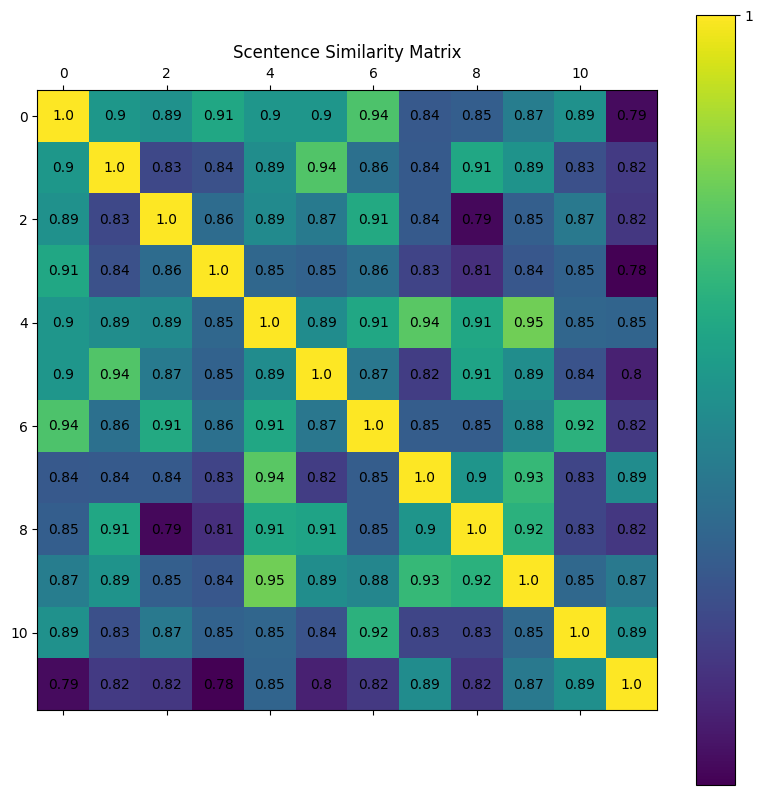

In [28]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10,10))
plt.title('Scentence Similarity Matrix')

cax = ax.matshow(matrix, interpolation='nearest', cmap='viridis')
fig.colorbar(cax,ticks=range(len(matrix)))

for (x, y), z in np.ndenumerate(matrix):
    ax.text(x, y, str(round(z, 2)), ha='center', va='center')

plt.savefig('sm_abstract.png')

In [22]:
print(sentences[0][0].text)
sentences[0][0].vector

With


array([-3.1319e+00, -6.5607e-01, -8.3195e-01,  9.5403e-01,  6.7765e+00,
        1.9311e+00, -1.8940e+00,  6.0834e+00, -1.6537e+00, -5.2166e-01,
       -3.4717e+00, -1.2390e-01, -4.6275e+00,  1.5761e+00,  2.3629e-01,
        5.7656e-01,  2.3055e+00, -2.8694e+00,  7.5239e-03, -4.2226e-01,
       -2.1657e+00,  1.2959e+00,  1.7327e+00, -1.2160e+00,  1.2882e+00,
        2.6585e+00,  3.1774e+00, -1.7320e+00,  3.1636e+00,  1.2208e+00,
       -1.9890e+00, -8.5598e-01,  4.6413e+00,  8.3117e-01,  8.0374e-01,
        2.8357e+00, -2.0102e-01,  7.3297e+00,  3.2132e+00,  5.3774e-01,
        1.2037e+00, -4.3621e-01, -2.8831e+00, -5.8517e-01, -1.9315e+00,
       -1.7042e+00,  4.0893e+00,  1.5194e-01,  2.7372e+00,  1.2390e+00,
       -1.4404e-01, -4.0075e+00,  3.8080e-01, -7.8254e+00,  9.7326e-01,
        4.6423e+00, -3.8418e+00,  2.0116e+00,  4.6952e+00, -2.5795e+00,
        3.8755e-01,  5.6856e+00,  3.9176e+00, -2.3271e+00,  4.8384e+00,
        2.8686e+00, -2.6947e-01, -7.5231e-01, -2.5817e+00,  3.49